<a href="https://colab.research.google.com/github/he4tnix/multimedia_tasks/blob/main/Actividad_7/Actividad_7_ContrerasPatricio_207676861.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 7</h2></center>
<center><h3>Image</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Patricio Contreras</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Operaciones usando Pytorch y OpenCV

### 1.1 Instala Numpy, Pytorch y OpenCV:
- Carga una imagen desde un archivo con extensión JPG, usando numpy, pytorch y opencv.
- Presenta la imagen
- Transforma la imagen de color a escala de grises usando cada uno de los paquetes
- Guarda la imagen nueva.
- Presenta la imagen transformada en el notebook.

<p align="justify">
Asegurate de presentar adecuandamente la imagen, usando Matplotlib u otro medio de ploteo.

In [58]:
#Se cargan las librerias

import numpy as np
import torch
import cv2
import matplotlib.pyplot as plt

In [59]:
#Se carga el archivo en un array de numpy
im_np = cv2.imread('280.jpg')
im_np = cv2.cvtColor(im_np, cv2.COLOR_BGR2RGB)  # Convertimos de BGR a RGB

In [60]:
#Se convierte el array numpy a tensor
im_tensor = torch.from_numpy(im_np).permute(2, 0, 1).float() / 255.0


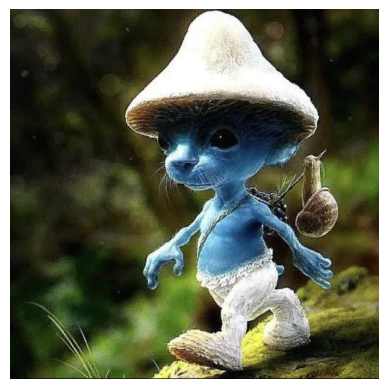

In [61]:
#Se muestra la imagen cargada
plt.imshow(im_np)
plt.axis('off')
plt.show()


In [62]:
#Se transforma la imagen a escala de Grises en OpenCV
gray_np = cv2.cvtColor(im_np, cv2.COLOR_RGB2GRAY)
cv2.imwrite('imagen_gris_numpy.jpg', gray_np)


True

In [63]:
#Se transforma a escala de grises con Pytorch
im_np = im_tensor.permute(1, 2, 0).numpy()
gray_tensor = torch.mean(im_tensor, dim=0, keepdim=True).squeeze().numpy()
cv2.imwrite('imagen_gris_torch.jpg', gray_tensor * 255)


True

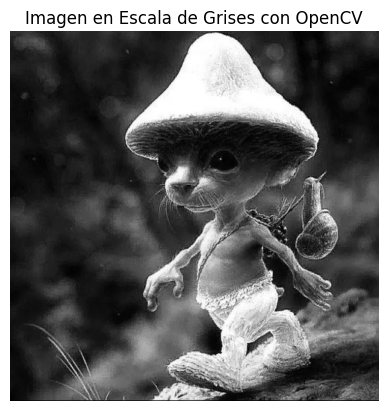

In [64]:
#Se plotea la imagen gris en numpy
plt.imshow(gray_np, cmap='gray')
plt.title("Imagen en Escala de Grises con OpenCV")
plt.axis('off')
plt.show()


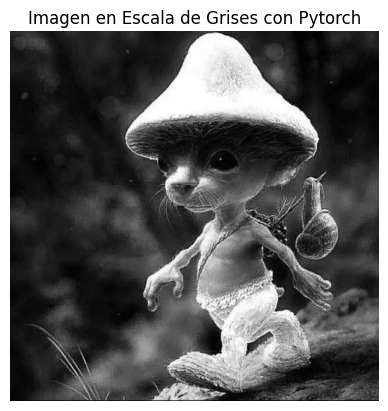

In [65]:
#Se plotea la imagen en escala grises pythorch
plt.imshow(gray_tensor, cmap='gray')
plt.title("Imagen en Escala de Grises con Pytorch")
plt.axis('off')
plt.show()


## 2. Multiples operaciones con tensores
### ¡USA LA IMAGEN ADJUNTA image.png!

#### 2.1 Aplica una transformación puntual. Modifica el valor de los pixeles considerando un valor de umbral (threshold). la función de treshold debe ser una rampa con una pendiente dada (tu defines el valor de la pendiente) y cuyo valor mínimo será 0 y el máximo será 255 (valores típicos de los pixeles).

In [66]:
#Se clona el repositorio
!git clone 'https://github.com/Jorgecardenas1/EIE_401_MULTIMEDIA.git'

fatal: destination path 'EIE_401_MULTIMEDIA' already exists and is not an empty directory.


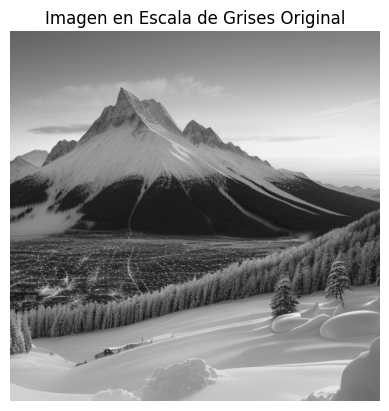

In [67]:
# Cargar la imagen en escala de grises usando OpenCV
gray_img = cv2.imread('/content/EIE_401_MULTIMEDIA/Actividades/Actividad 7/image.png', cv2.IMREAD_GRAYSCALE)

# Mostrar la imagen original en escala de grises
plt.imshow(gray_img, cmap='gray')
plt.title("Imagen en Escala de Grises Original")
plt.axis('off')
plt.show()

In [68]:
# Se define una función rampa con umbral
def apply_threshold_ramp(img, threshold, slope):
    img = img.astype(np.float32)
    transformed_img = slope * (img - threshold)
    transformed_img = np.clip(transformed_img, 0, 255)
    return transformed_img.astype(np.uint8)

# Parámetros
threshold = 128
slope = 1.0

#Se aplica la transformación usando Numpy
gray_img_transformed_np = apply_threshold_ramp(gray_img, threshold, slope)
cv2.imwrite('imagen_transformed_numpy.png', gray_img_transformed_np)

#Se aplica la transformación usando Pytorch
gray_tensor = torch.from_numpy(gray_img).float()
gray_tensor_transformed = slope * (gray_tensor - threshold)
gray_tensor_transformed = torch.clamp(gray_tensor_transformed, 0, 255)
gray_img_transformed_torch = gray_tensor_transformed.numpy().astype(np.uint8)
cv2.imwrite('imagen_transformed_torch.png', gray_img_transformed_torch)


True

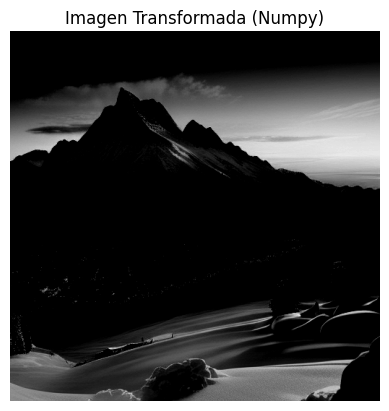

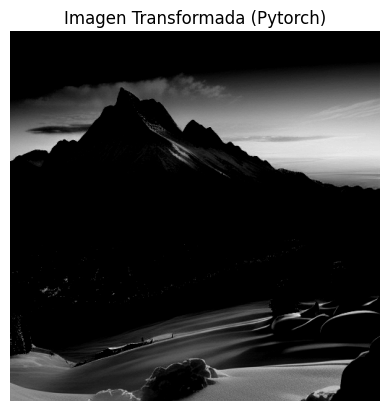

In [69]:
#Se muestra la imagen transformada usando Numpy
plt.imshow(gray_img_transformed_np, cmap='gray')
plt.title("Imagen Transformada (Numpy)")
plt.axis('off')
plt.show()

#Se muestra la imagen transformada usando Pytorch
plt.imshow(gray_img_transformed_torch, cmap='gray')
plt.title("Imagen Transformada (Pytorch)")
plt.axis('off')
plt.show()


#### 2.2 Aplica una transformación en la vecindad.
- Debes hacer una vecindad con dimensiones de 5x5 pixeles.
- Aplica la transformación de tal forma que los pixeles cambien para tener el valor correspondiente al máximo de todos los vecinos.
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.



Esto se puede hacer tanto utilizando la libreria OpenCV y Pytorch

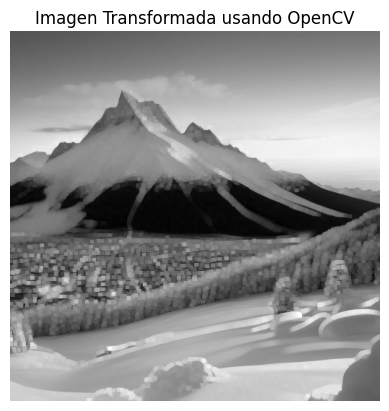

In [70]:
#Usando OpenCV
#Se define tamaño de la vecindad
kernel_size = 5
kernel = np.ones((kernel_size, kernel_size), np.uint8)

#Se aplica la transformación de vecindad usando OpenCV
transformed_img_cv = cv2.dilate(gray_img, kernel, iterations=1)

#Se guarda la imagen
cv2.imwrite('imagen_transformed_opencv.png', transformed_img_cv)

#Se muestra la imagen transformada usando OpenCV
plt.imshow(transformed_img_cv, cmap='gray')
plt.title("Imagen Transformada usando OpenCV")
plt.axis('off')
plt.show()


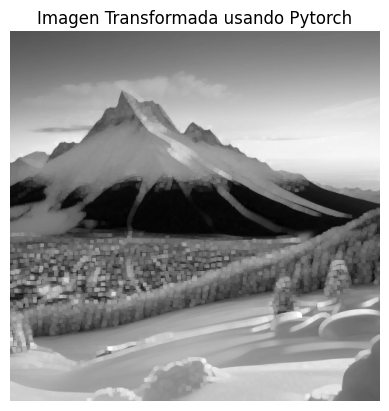

In [71]:
#Usando Pytorch

import torch.nn.functional as F

#Se convierte la imagen a tensor
gray_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(0).float()

# Se define la vecindad de 5x5
max_pool = torch.nn.MaxPool2d(kernel_size, stride=1, padding=kernel_size//2)

#Se aplica la transformación de vecindad usando Pytorch
transformed_tensor = max_pool(gray_tensor)

#Transformación de tensor a imagen
transformed_img_torch = transformed_tensor.squeeze().numpy().astype(np.uint8)

#Se guarda la imagen transformada
cv2.imwrite('imagen_transformed_torch.png', transformed_img_torch)

#Se muestra la imagen transformada usando Pytorch
plt.imshow(transformed_img_torch, cmap='gray')
plt.title("Imagen Transformada usando Pytorch")
plt.axis('off')
plt.show()


#### 2.3 Aplica transformación de intensidad
![image.png](attachment:image.png)
- Debes hacer una vecindad con dimensiones de 10x10 pixeles.
- Aplica la transformación que aparece en la ecuación de tal forma que los pixeles cambien dependiendo de la posición (r) y el coeficiente c (de tu elección).
- Debes hacer la misma operación a lo largo y ancho de toda la imagen. ESto implica, de forma iterativa, recorrer la imagen.

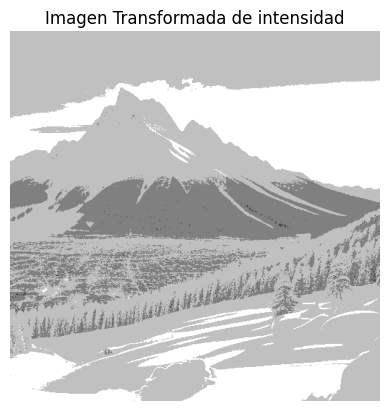

In [72]:
# Parámetros
neighborhood_size = 10 #Tamaño vecindad
c = 1.0  # coeficiente

#Se sacan las dimensiones de la imagen
height, width = gray_img.shape

#Se crea una copia de la imagen para almacenar el resultado
transformed_img = np.zeros_like(gray_img)

#Se crea un padding para manejar bordes
padded_img = np.pad(gray_img, pad_width=neighborhood_size//2, mode='reflect')

# Definir la función de transformación
def intensity_transform(I, c):
    return c * np.log(1 + I)

# Iterar sobre la imagen
for i in range(height):
    for j in range(width):
        #Se obtiene la vecindad de 10x10 píxeles
        neighborhood = padded_img[i:i+neighborhood_size, j:j+neighborhood_size]

        #Se calcula la nueva intensidad usando la transformación
        transformed_pixel = intensity_transform(neighborhood[neighborhood_size//2, neighborhood_size//2], c)

        #rango válido [0, 255]
        transformed_img[i, j] = np.clip(transformed_pixel, 0, 255)

#Se convierte a tipo uint8
transformed_img = transformed_img.astype(np.uint8)

#Se guarda la imagen transformada
cv2.imwrite('imagen_transformed_intensity.png', transformed_img)

#Se muestra la imagen transformada
plt.imshow(transformed_img, cmap='gray')
plt.title("Imagen Transformada de intensidad")
plt.axis('off')
plt.show()


#### 2.4 Operación con Kernel
- Realiza tres operaciones de convolución en cascada.
- Utiliza torch nn.Conv2d
- Debes calcular el stride, padding y demás parámetros para que obtengas 16 canales de salida.
- Muestra una imagen de cada canal resultante de la convolución.

Shape of output tensor: torch.Size([1, 16, 512, 512])


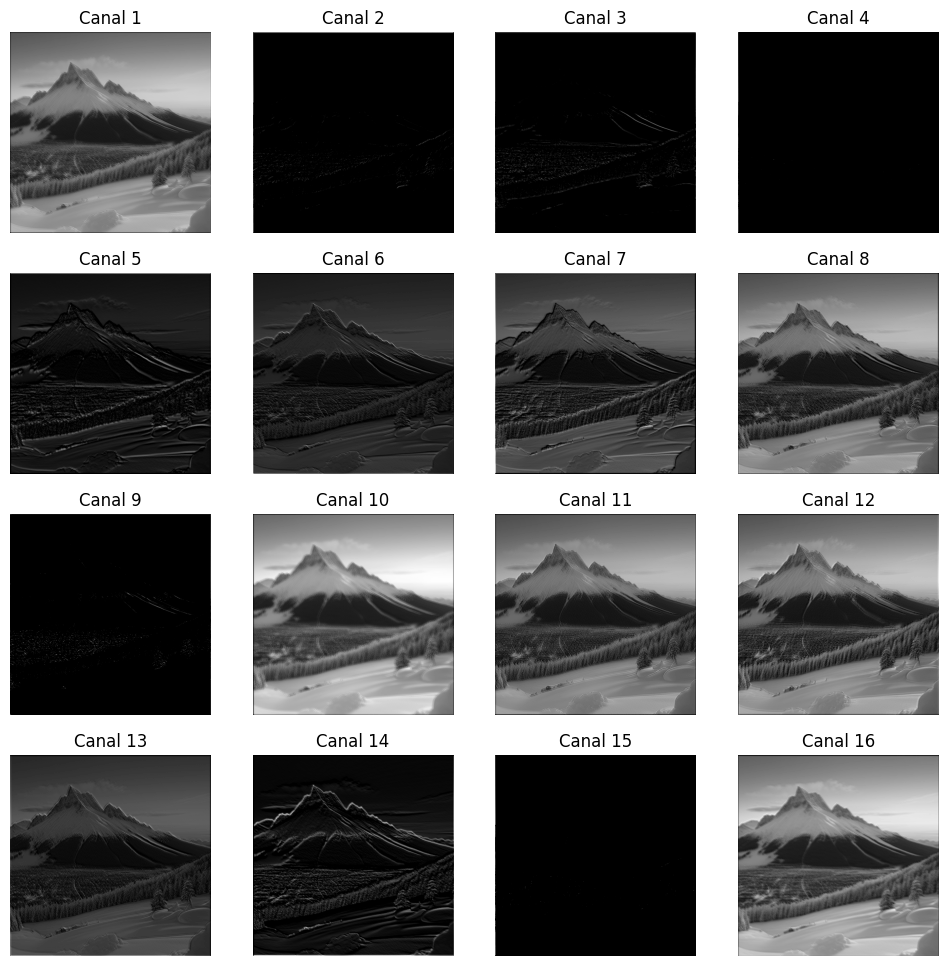

In [73]:
import torch.nn as nn

class ConvCascade(nn.Module):
    def __init__(self):
        super(ConvCascade, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=16, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = self.conv3(x)
        x = nn.ReLU()(x)
        return x

# Crear la red y pasar la imagen a través de ella
model = ConvCascade()
output = model(gray_tensor)

# Verificar las dimensiones del tensor de salida
print("Shape of output tensor:", output.shape)

# Convertir el tensor de salida a un formato que se pueda visualizar
output_np = output.squeeze(0).detach().numpy()

# Mostrar cada uno de los 16 canales resultantes de la convolución
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i in range(16):
    ax = axes[i // 4, i % 4]
    ax.imshow(output_np[i], cmap='gray')
    ax.set_title(f'Canal {i+1}')
    ax.axis('off')

plt.show()


## 3. Realiza la inversión de imagen

### 3.1 Utilizando estrictamente numpy, busca y usa una imagen binaria y realizar la inversión de dicha imagen.
### Recuerda adjuntar la imagen a la entrega de tu trabajo.


(-0.5, 299.5, 299.5, -0.5)

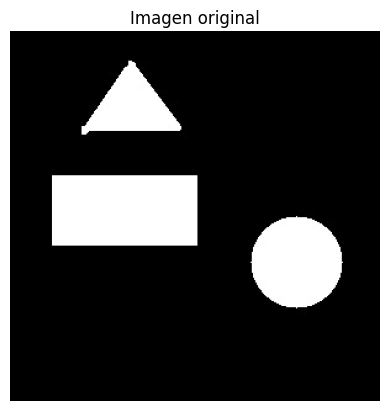

In [78]:
#Se carga la imagen binaria

binary_im = cv2.imread('binary.jpg', cv2.IMREAD_GRAYSCALE)

#Se muestra la imagen original
plt.title('Imagen original')
plt.imshow(binary_im, cmap='gray')
plt.axis('off')

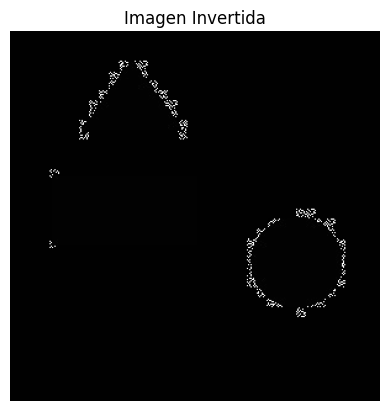

In [80]:

#Se hace la inversión de la imagen
inverted_image = 1 - binary_im


#Se muestra imagen invertida
plt.imshow(inverted_image, cmap='gray')
plt.title('Imagen Invertida')
plt.axis('off')
plt.show()


### 3.1 Usando Pytorch y opencv, realiza la inversión de la misma imagen.



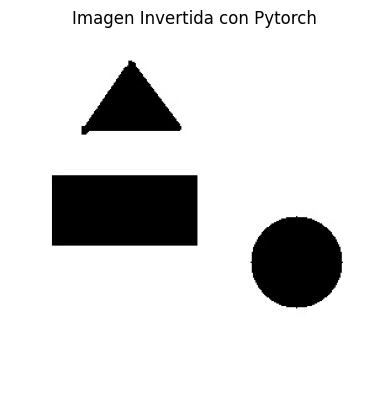

In [81]:
#Se carga la imagen binaria con OpenCV
binary_im = cv2.imread('binary.jpg', cv2.IMREAD_GRAYSCALE)

#Se convierte la imagen a un tensor PyTorch y normalizar los valores
tensor_im = torch.from_numpy(binary_im).float() / 255.0

#Se invierte la imagen
inverted_tensor_im = 1 - tensor_im

#Se convierte el tensor invertido de nuevo a una matriz numpy y escalar los valores de nuevo a [0, 255]
inverted_im = (inverted_tensor_im * 255).byte().numpy()

#Se muestra la imagen invertida
plt.imshow(inverted_im, cmap='gray')
plt.title('Imagen Invertida con Pytorch')
plt.axis('off')
plt.show()


## 4. Segmentación de imagen
#### 4.1 Realiza un algoritmo para dividir una imagen con 3 canales RGB de 512x512, en parches (secciones) de 16x16. Presenta cada parche generado de la imagen.
El algoritmo debe tolerar el cambio de imagen por una de menor tamano (128, 64). Claramente, en cada caso el número de parches será menor.
    

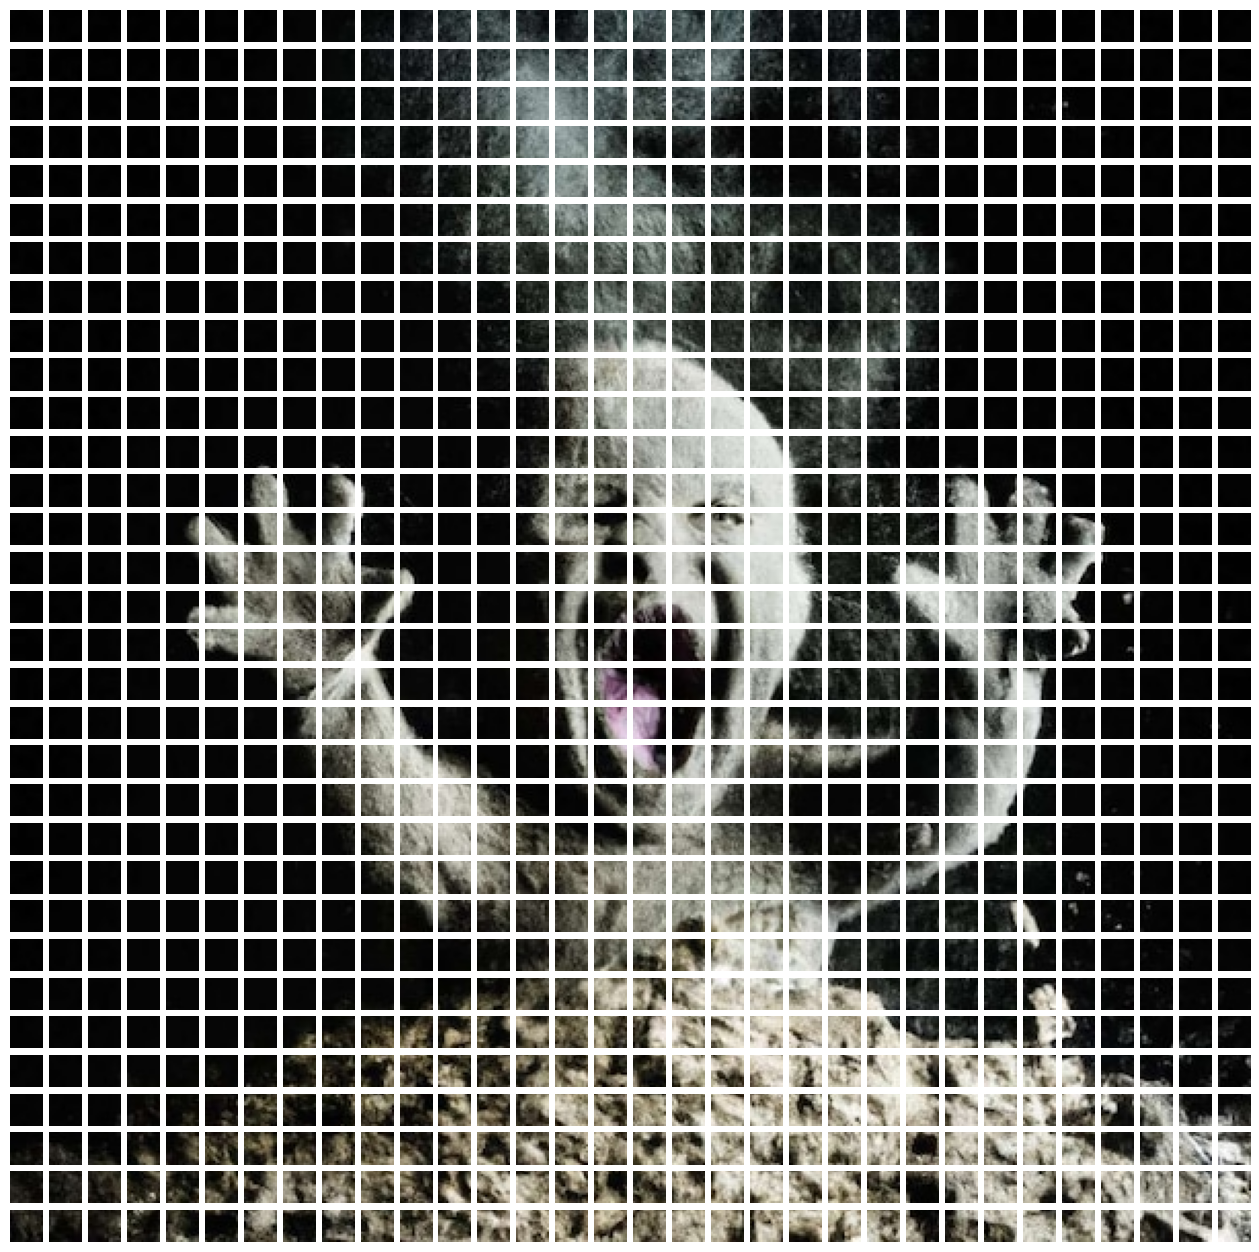

In [82]:

#se crea una función para dividir la imagen en parches de tamaño dado
def split_image_into_patches(image, patch_size):
    patches = []
    height, width = image.shape[:2]
    for y in range(0, height, patch_size):
        for x in range(0, width, patch_size):
            patch = image[y:y+patch_size, x:x+patch_size]
            patches.append(patch)
    return patches

#Se carga la imagen 512x512
im = cv2.imread('ashbaby.jpg')

#Se definen tamaños de parches
patch_size = 16

#Se divide en parches
patches = split_image_into_patches(im, patch_size)

#Se muestra cada parche generado
fig, axes = plt.subplots(32, 32, figsize=(16, 16))
for i in range(32):
    for j in range(32):
        patch_index = i * 32 + j
        if patch_index < len(patches):
            axes[i, j].imshow(cv2.cvtColor(patches[patch_index], cv2.COLOR_BGR2RGB))
            axes[i, j].axis('off')

# Descomentar esta linea para ver la imagen completa y ver la imagen segmentada completa
# plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


## 5. Referencias
<p align="justify">
    
[OpenCV] https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html

[inversion] https://medium.com/analytics-vidhya/inverting-an-image-using-numpys-broadcasting-method-1f5beb7f9fa5#:~:text=In%20order%20to%20invert%20the,negation)%20operation%20to%20the%20image.
